In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm

from observational_fear.trajectories import TrajectoryBlockByTrial, TrajectoryVisulizer, TrajectoryFreezeByTrial, TrajectoryCombinedBlockByTrial, TrajectoryCombinedFreezeByTrial

from observational_fear.stats import auc

sns.set_style("whitegrid")
DATA_DIR = Path(r"F:\OFL\one-p experiment\data")
FIG_DIR = Path(r"C:\Users\roryl\repos\observational-fear\figs")
save_dir = DATA_DIR / "derived" / "tradjectories"
save_dir.mkdir(exist_ok=True)

In [2]:
def get_rotated_average_trajectories(trajectory_finder: TrajectoryBlockByTrial, n_shuffles: int, supress_warnings: bool = True) -> pd.DataFrame:
    import warnings
    if supress_warnings:
        warnings.simplefilter("ignore")
    null_trajectories = []
    for i in tqdm(range(n_shuffles)):
        null_trajectory_finder = TrajectoryBlockByTrial(
            trajectory_finder.data_dir,
            trajectory_finder.session,
            block=trajectory_finder.block,
            sampling_interval=trajectory_finder.sampling_interval,
            t_before=trajectory_finder.t_before,
            t_after=trajectory_finder.t_after,
            rotate=True,
        )
        null_trajectories.append(null_trajectory_finder.average_trajectories.assign(shuffle=i))
    if supress_warnings:
        warnings.simplefilter("default")
    return pd.concat(null_trajectories)


def get_rotated_average_trajectories_freeze(trajectory_finder: TrajectoryFreezeByTrial, n_shuffles: int, supress_warnings: bool = True) -> pd.DataFrame:
    import warnings
    if supress_warnings:
        warnings.simplefilter("ignore")
    null_trajectories = []
    for i in tqdm(range(n_shuffles)):
        null_trajectory_finder = TrajectoryFreezeByTrial(
            trajectory_finder.data_dir,
            trajectory_finder.session,
            start_stop=trajectory_finder.start_stop,
            sampling_interval=trajectory_finder.sampling_interval,
            t_before=trajectory_finder.t_before,
            t_after=trajectory_finder.t_after,
            rotate=True,
        )
        null_trajectories.append(null_trajectory_finder.average_trajectories.assign(shuffle=i))
    if supress_warnings:
        warnings.simplefilter("default")
    return pd.concat(null_trajectories)

c:\users\roryl\repos\neurobox\neurobox\wide_transforms.py:99: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df["time"] = pd.to_timedelta(df.index, unit="s")
c:\users\roryl\repos\observational-fear\observational_fear\utils.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_traces["time"].values, events, time_before=t_before, time_after=t_after


<Axes3DSubplot:xlabel='Time', ylabel='PC1'>

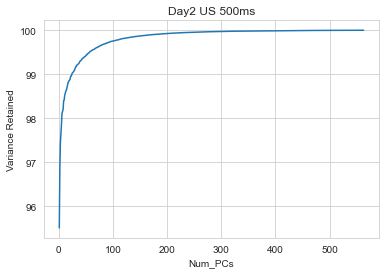

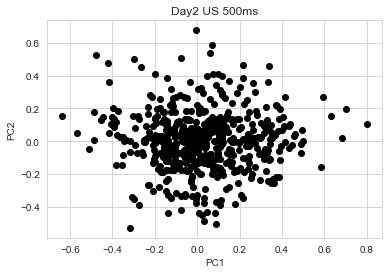

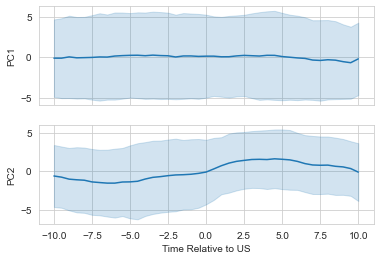

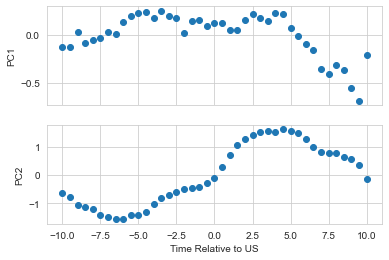

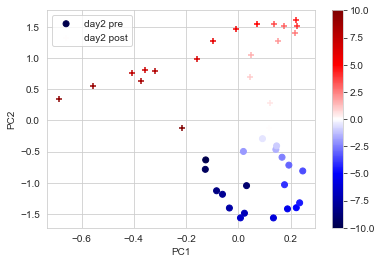

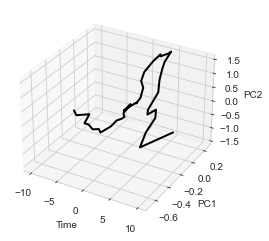

In [3]:
trajectory_finder = TrajectoryBlockByTrial(
    DATA_DIR,
    "day2",
    block="US",
    sampling_interval="500ms",
    t_before=10,
    t_after=10,
    save_dir=save_dir,
    )

# trajectory_finder.save()

plotter = TrajectoryVisulizer(name="Day2 US 500ms", save=False, save_dir=save_dir)
plotter.plot_scree(trajectory_finder.scree)
plotter.plot_loadings(loadings = trajectory_finder.loadings)
plotter.plot_trajectories_line(trajectory_finder.trajectories)
plotter.plot_avg_trajectories_line(trajectory_finder.average_trajectories)
plotter.plot_trajectories_pc_space_2d(trajectory_finder.average_trajectories)
plotter.plot_trajectories_pc_space_3d(trajectory_finder.trajectories)

  0%|          | 0/75 [00:00<?, ?it/s]

0.04


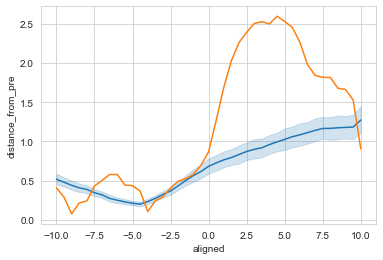

In [4]:
df = get_rotated_average_trajectories(trajectory_finder, n_shuffles=75)
true = trajectory_finder.average_trajectories
obs = auc(true.loc[lambda x: (x.aligned < 2) & (x.aligned > 0)].distance_from_pre)
reps = df.groupby("shuffle").apply(lambda x: auc(x.loc[lambda x: (x.aligned < 2) & (x.aligned > 0)].distance_from_pre))
print((reps >= obs).mean())

ax = df.groupby(["aligned", "shuffle"])["distance_from_pre"].mean().reset_index().pipe((sns.lineplot, "data"), x="aligned", y="distance_from_pre")
res = true.groupby("aligned")["distance_from_pre"].mean().reset_index()
ax.plot(res["aligned"], res["distance_from_pre"])
plt.savefig(save_dir / "Distance versus Shuffle USD2.svg")

c:\users\roryl\repos\neurobox\neurobox\wide_transforms.py:99: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df["time"] = pd.to_timedelta(df.index, unit="s")
c:\users\roryl\repos\binit\binit\align.py:93: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  aligned_data = (to_be_aligned - to_align_to[idx - 1]).astype(np.float)
c:\users\roryl\repos\binit\binit\align.py:139: DeprecationWarning: `np.int` is a deprecated alias for the builtin `i

<Axes3DSubplot:xlabel='Time', ylabel='PC1'>

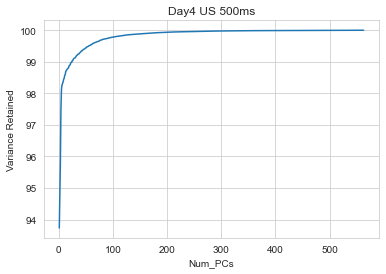

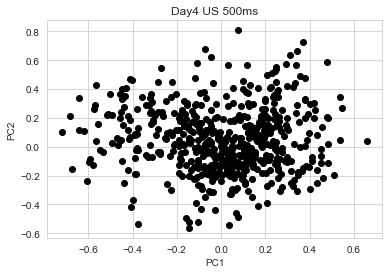

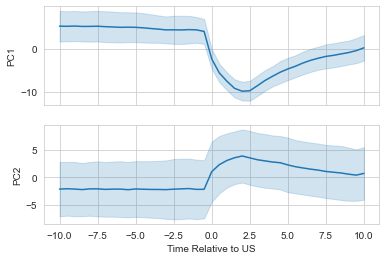

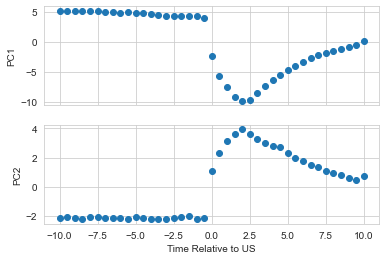

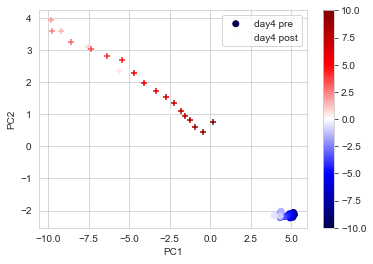

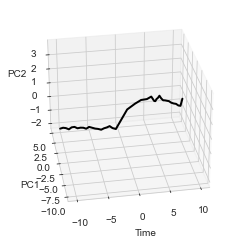

In [5]:
trajectory_finder = TrajectoryBlockByTrial(
    DATA_DIR,
    "day4",
    block="US",
    sampling_interval="500ms",
    t_before=10,
    t_after=10,
    save_dir=save_dir,
    )

# trajectory_finder.save()

plotter = TrajectoryVisulizer(name="Day4 US 500ms", save=True, save_dir=save_dir)
plotter.plot_scree(trajectory_finder.scree)
plotter.plot_loadings(loadings = trajectory_finder.loadings)
plotter.plot_trajectories_line(trajectory_finder.trajectories)
plotter.plot_avg_trajectories_line(trajectory_finder.average_trajectories)
plotter.plot_trajectories_pc_space_2d(trajectory_finder.average_trajectories)
plotter.plot_trajectories_pc_space_3d(trajectory_finder.trajectories, rotation=(30, 260))

  0%|          | 0/75 [00:00<?, ?it/s]

0.0


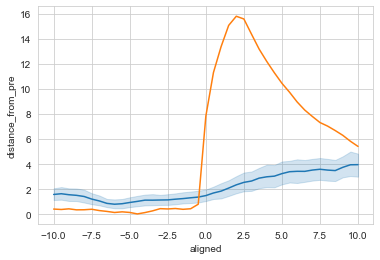

In [6]:
df = get_rotated_average_trajectories(trajectory_finder, n_shuffles=75)
true = trajectory_finder.average_trajectories
obs = auc(true.loc[lambda x: (x.aligned < 2) & (x.aligned > 0)].distance_from_pre)
reps = df.groupby("shuffle").apply(lambda x: auc(x.loc[lambda x: (x.aligned < 2) & (x.aligned > 0)].distance_from_pre))
print((reps >= obs).mean())

ax = df.groupby(["aligned", "shuffle"])["distance_from_pre"].mean().reset_index().pipe((sns.lineplot, "data"), x="aligned", y="distance_from_pre")
res = true.groupby("aligned")["distance_from_pre"].mean().reset_index()
ax.plot(res["aligned"], res["distance_from_pre"])
plt.savefig(save_dir / "Distance versus Shuffle USD4.svg")

c:\users\roryl\repos\neurobox\neurobox\wide_transforms.py:99: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df["time"] = pd.to_timedelta(df.index, unit="s")
c:\users\roryl\repos\observational-fear\observational_fear\utils.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_traces["time"].values, events, time_before=t_before, time_after=t_after


<Axes3DSubplot:xlabel='Time', ylabel='PC1'>

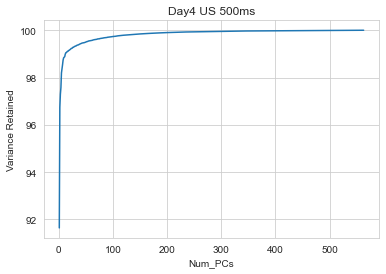

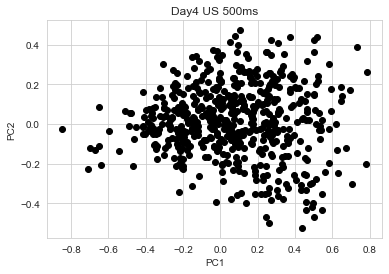

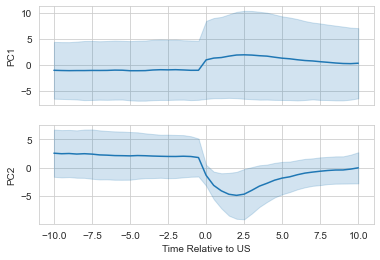

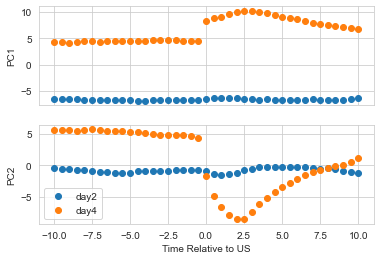

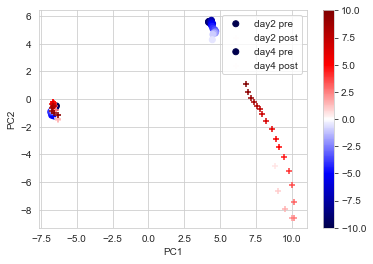

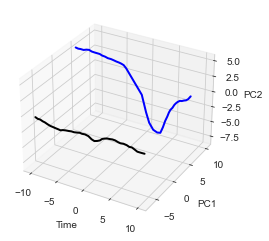

In [3]:
trajectory_finder = TrajectoryCombinedBlockByTrial(
    DATA_DIR,
    session_block1=("day2", "US"),
    session_block2=("day4", "US"),
    sampling_interval="500ms",
    t_before=10,
    t_after=10,
    save_dir=save_dir,
    )

plotter = TrajectoryVisulizer(name="Day4 US 500ms", save=False, save_dir=save_dir)
plotter.plot_scree(trajectory_finder.scree)
plotter.plot_loadings(loadings = trajectory_finder.loadings)
plotter.plot_trajectories_line(trajectory_finder.trajectories)
plotter.plot_avg_trajectories_line(trajectory_finder.average_trajectories)
plotter.plot_trajectories_pc_space_2d(trajectory_finder.average_trajectories)
plotter.plot_trajectories_pc_space_3d(trajectory_finder.trajectories, 
# rotation=(30, 260)
)

c:\users\roryl\repos\neurobox\neurobox\wide_transforms.py:99: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df["time"] = pd.to_timedelta(df.index, unit="s")
c:\users\roryl\repos\binit\binit\align.py:93: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  aligned_data = (to_be_aligned - to_align_to[idx - 1]).astype(np.float)
c:\users\roryl\repos\binit\binit\align.py:139: DeprecationWarning: `np.int` is a deprecated alias for the builtin `i

<Axes3DSubplot:xlabel='Time', ylabel='PC1'>

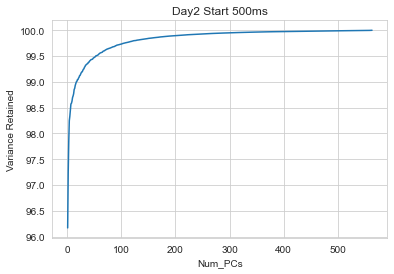

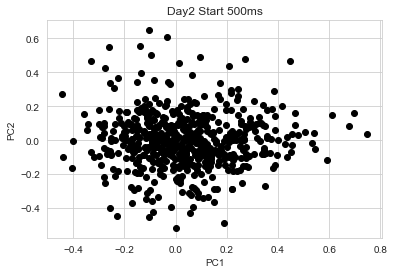

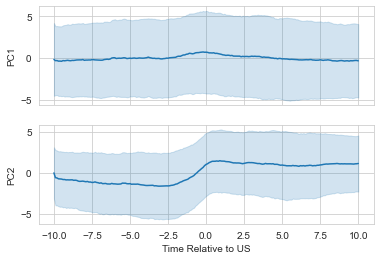

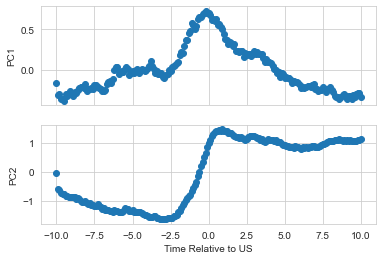

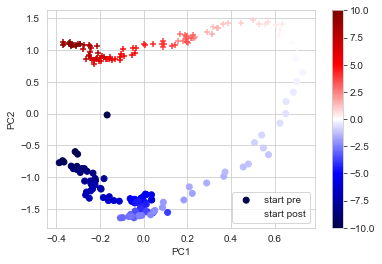

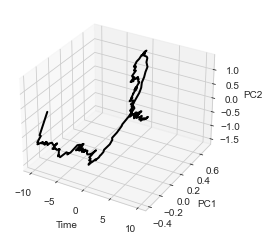

In [7]:
# Freeze Start

trajectory_finder = TrajectoryFreezeByTrial(
    DATA_DIR,
    "day2",
    start_stop="start",
    sampling_interval="100ms",
    t_before=10,
    t_after=10,
    save_dir=save_dir,
    )

trajectory_finder.save()

plotter = TrajectoryVisulizer(name="Day2 Start 500ms", save=False, save_dir=save_dir)
plotter.plot_scree(trajectory_finder.scree)
plotter.plot_loadings(loadings = trajectory_finder.loadings)
plotter.plot_trajectories_line(trajectory_finder.trajectories)
plotter.plot_avg_trajectories_line(trajectory_finder.average_trajectories)
plotter.plot_trajectories_pc_space_2d(trajectory_finder.average_trajectories, compare_col="start_stop")
plotter.plot_trajectories_pc_space_3d(trajectory_finder.trajectories, compare_col="start_stop")

  0%|          | 0/75 [00:00<?, ?it/s]

0.0


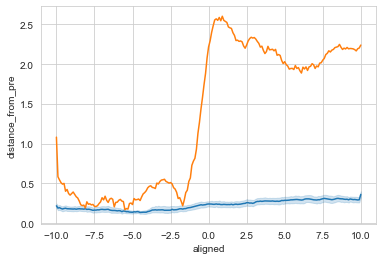

In [8]:
df = get_rotated_average_trajectories_freeze(trajectory_finder, n_shuffles=75)
true = trajectory_finder.average_trajectories
obs = auc(true.loc[lambda x: (x.aligned < 2) & (x.aligned > 0)].distance_from_pre)
reps = df.groupby("shuffle").apply(lambda x: auc(x.loc[lambda x: (x.aligned < 2) & (x.aligned > 0)].distance_from_pre))
print((reps >= obs).mean())

ax = df.groupby(["aligned", "shuffle"])["distance_from_pre"].mean().reset_index().pipe((sns.lineplot, "data"), x="aligned", y="distance_from_pre")
res = true.groupby("aligned")["distance_from_pre"].mean().reset_index()
plt.plot(res["aligned"], res["distance_from_pre"])
plt.savefig(save_dir / "Start versus Shuffle D2.svg")

c:\users\roryl\repos\neurobox\neurobox\wide_transforms.py:99: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df["time"] = pd.to_timedelta(df.index, unit="s")
c:\users\roryl\repos\binit\binit\align.py:93: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  aligned_data = (to_be_aligned - to_align_to[idx - 1]).astype(np.float)
c:\users\roryl\repos\binit\binit\align.py:139: DeprecationWarning: `np.int` is a deprecated alias for the builtin `i

<Axes3DSubplot:xlabel='Time', ylabel='PC1'>

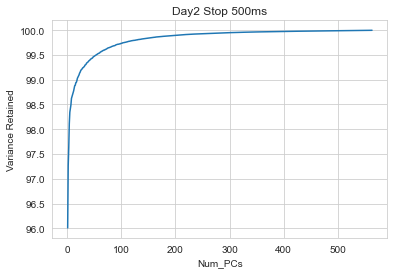

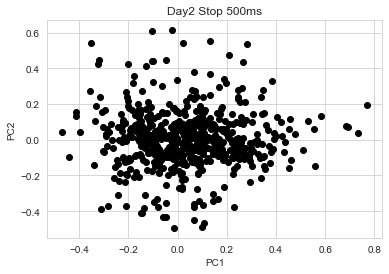

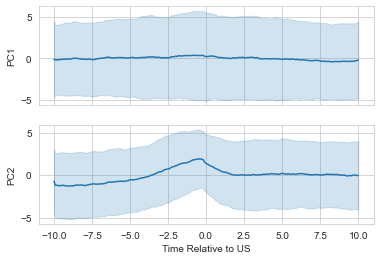

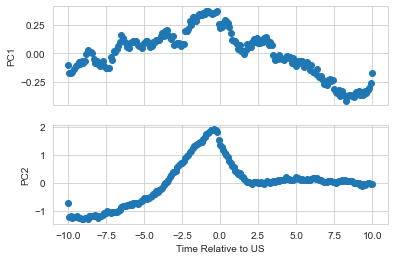

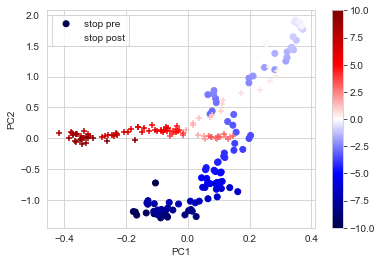

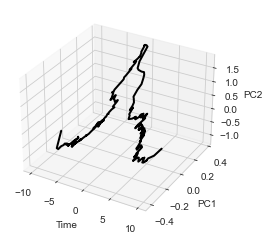

In [9]:
# Freeze Start

trajectory_finder = TrajectoryFreezeByTrial(
    DATA_DIR,
    "day2",
    start_stop="stop",
    sampling_interval="100ms",
    t_before=10,
    t_after=10,
    save_dir=save_dir,
    )

trajectory_finder.save()

plotter = TrajectoryVisulizer(name="Day2 Stop 500ms", save=True, save_dir=save_dir)
plotter.plot_scree(trajectory_finder.scree)
plotter.plot_loadings(loadings = trajectory_finder.loadings)
plotter.plot_trajectories_line(trajectory_finder.trajectories)
plotter.plot_avg_trajectories_line(trajectory_finder.average_trajectories)
plotter.plot_trajectories_pc_space_2d(trajectory_finder.average_trajectories, compare_col="start_stop")
plotter.plot_trajectories_pc_space_3d(trajectory_finder.trajectories, compare_col="start_stop")

  0%|          | 0/75 [00:00<?, ?it/s]

0.013333333333333334


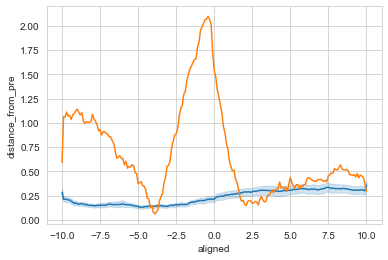

In [10]:
df = get_rotated_average_trajectories_freeze(trajectory_finder, n_shuffles=75)
true = trajectory_finder.average_trajectories
obs = auc(true.loc[lambda x: (x.aligned < 2) & (x.aligned > 0)].distance_from_pre)
reps = df.groupby("shuffle").apply(lambda x: auc(x.loc[lambda x: (x.aligned < 2) & (x.aligned > 0)].distance_from_pre))
print((reps >= obs).mean())

ax = df.groupby(["aligned", "shuffle"])["distance_from_pre"].mean().reset_index().pipe((sns.lineplot, "data"), x="aligned", y="distance_from_pre")
res = true.groupby("aligned")["distance_from_pre"].mean().reset_index()
plt.plot(res["aligned"], res["distance_from_pre"])
plt.savefig(save_dir / "Stop versus Shuffle D2.svg")